In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## Theory questions

1. $$f(x) = x^TAx + b^Tx + c$$

$$f(x) =  \sum_{ij} x_i x_j a_{ij} + \sum_i x_i b_i  $$

$$\dfrac{\partial f}{\partial x_k} = \sum_j x_j a_{kj} + \sum_i x_i a_{ik} + b_k$$

$$\nabla f = (A + A^T)x + b$$

$$\dfrac{\partial^2 f}{\partial x_k x_n} = a_{km} + a_{mk}$$

$$\nabla^2 f = A + A^T$$


2. 

$$x_1, ..., x_N \approx N(\mu, \sigma^2)$$

$$P(x_i) = \dfrac{1}{\sigma \sqrt{2 \pi}} e^{\dfrac{-(x_i - \mu)^2}{2\sigma^2}}$$

$$P(x_1, ..., x_N) = \prod_i P(X_i) = \prod_i \dfrac{1}{\sigma \sqrt{2 \pi}} e^{-\dfrac{(x_i - \mu)^2}{2\sigma^2}}$$

$$max_{\mu, \sigma} log P(X_1, ..., X_N) = \sum_i \left(-\dfrac{(x_i - \mu)^2}{2\sigma^2} - log \sigma \right) $$


$$\dfrac{\partial log P(X_1, ..., X_N)}{\partial \mu} = -\sum_i \dfrac{x_i - \mu}{\sigma^2} = 0$$

$$\mu_* = \dfrac{\sum_i x_i}{N}$$

Let's denote $$sigma^2 = s:$$

$$\dfrac{\partial log P(X_1, ..., X_N)}{\partial s} = \dfrac{\sum_i \left(-\dfrac{(x_i - \mu)^2}{2s} - log \sqrt{s} \right)}{\partial s} =  \sum_i \left(\dfrac{(x_i - \mu)^2}{2s^2} -  \dfrac{1}{2\sqrt{s} \cdot \sqrt{s}} \right) = 0$$

$$\sum_i (x_i - \mu)^2 - Ns = 0$$

$$s_*= \sigma^2_*= \dfrac{(x_i - \mu)^2}{N}$$

$$\mathbb{E} \mu^* = \mathbb{E} \dfrac{\sum_i x_i}{N} = \mu$$

If we know the $\mu$

$$\mathbb{E} \sigma^2_* = \mathbb{E} \dfrac{(x_i - \mu)^2}{N} = \mathbb{E} \dfrac{x_i^2 - 2 x_i \mu + \mu^2}{N} = \dfrac{1}{N} \sum_i \mathbb{E} x_i^2 - (\mathbb{E} x_i)^2 - mu^2 + mu^2 = \dfrac{\sum_i \mathbb{D} x_i}{N} = D x_i $$


If we don't know the $\mu$, replace it with an estimate


$$\mathbb{E} \sigma^2_*  = \mathbb{E} \sum_ i \dfrac{(x_i - \mu_*)^2}{N} =  \mathbb{E} \dfrac{\sum_i (x_i - \mu_* - \mu + \mu)^2}{N} = \dfrac{1}{N} \mathbb{E} \sum_i \left((x_i - \mu) - (\mu_* - \mu) \right)^2 = \dfrac{1}{N} \mathbb{E}  \sum_i \left((x_i - \mu) - \dfrac{1}{N}\sum_j(x_j - \mu) \right)^2  = $$

 $$ = \dfrac{1}{N} \left( \mathbb{E}  \sum_i \left(\dfrac{N - 1}{N}(x_i - \mu) - \dfrac{1}{N}\sum_{j \neq i}(\mu - x_j) \right)^2 \right) = $$


$$ \dfrac{1}{N}   \sum_i \dfrac{(N - 1)^2}{N^2} \mathbb{E} (x_i - \mu)^2 - \dfrac{2 (N - 1)}{N^2} \mathbb{E} (x_i - \mu) \sum_{j \neq i} (x_j - \mu) + \dfrac{1}{N^2} \sum_i \mathbb{E} \left(\sum_{j \neq i} (x_j - \mu)\right)^2  = $$

The cross products get zeroed-out because their expectation is 0





 $$\dfrac{(N - 1)^2}{N^2} \sigma^2 + \dfrac{1}{N^3} \sum_{j \neq i} \mathbb{E} (x_j - \mu)^2 =  \dfrac{(N - 1)^2}{N^2} \sigma^2 + \dfrac{N - 1}{N^2} \sigma^2 = \dfrac{(N - 1)(N - 1 + 1)}{N^2} = \dfrac{(N-1)}{N} \sigma^2$$

## Load data

In [2]:
from helper import load_data, normalize_data

data = load_data()
(N, d) = data.shape
print("Number of data points: ", N)
print("Dimension of each data point: ", d)

Number of data points:  272
Dimension of each data point:  2


### Initialize your cluster centers

In [5]:
def initialize_clusters(data, k):
    """randomly initialize the k cluster centers (the means). Make sure you choose k clusters from the data itself,
             or ensure otherwise that your initializations have the same scale as the data

    Args:
        data: shape = (N, d). original data.
        k: integer number. predefined number of clusters for the k-means algorithm.
    Returns:
        numpy array with shape (k, d) which corresponds to the k initial clusters.
    """
    medoid_idx = np.random.choice(data.shape[0], k, replace=False)
    medoids = data[medoid_idx]
    return medoids

In [6]:
initialize_clusters(data, 3)

array([[ 4.267, 78.   ],
       [ 4.583, 76.   ],
       [ 4.35 , 82.   ]])

### Update k-means parameters

#### Build distance matrix
Build a distance matrix, collecting the distances of the original dataset to the means of the clusters.

NOTE: once you finish your `build_distance_matrix`, please copy the function to the `helper.py` function. Otherwise, the `kmeans` function will not work.

In [13]:
def build_distance_matrix(data, mu):
    """builds a distance matrix.

    Args:
        data: numpy array of shape = (N, d). original data.
        mu:   numpy array of shape = (k, d). Each row corresponds to a cluster center.
    Returns:
        numpy array of shape (N, k):
            squared distances matrix,
            the value row i column j corresponds to the squared distance of datapoint i with cluster center j.
    """
    return np.sum((data[:, np.newaxis, :] - mu[np.newaxis, :, :]) ** 2, axis=2)

#### Update k-means parameters

In [17]:
def update_kmeans_parameters(data, mu_old):
    """compute one step of the kmeans algorithm: using mu_old, find to which cluster each datapoint belongs to,
            then update the parameter cluster centers.

    Args:
        data:   numpy array of shape = (N, d). original data.
        mu_old: numpy array of shape = (k, d). Each row corresponds to a cluster center.
    Returns:
        losses: shape (N, ), contains the (old) squared distances of each data point to its (old) cluster mean (computed from mu_old).
        assignments: vector of shape (N, ) which contains the cluster associated to each data point.
        mu: updated vector mu of shape (k, d) where each row corresponds to the new cluster center.
    """
    N, d = data.shape
    k, _ = mu_old.shape
    dist = build_distance_matrix(data, mu_old)
    assignments = np.argmin(dist, axis=1)
    losses = np.min(dist, axis=1)
    mu = np.zeros((k, d))
    for i in range(k):
        mu[i] = np.mean(data[assignments == i], axis=0)
    return losses, assignments, mu

#### Play with k-means

The current iteration of k-means is: 0,                    the average loss is 40.36960799632352.


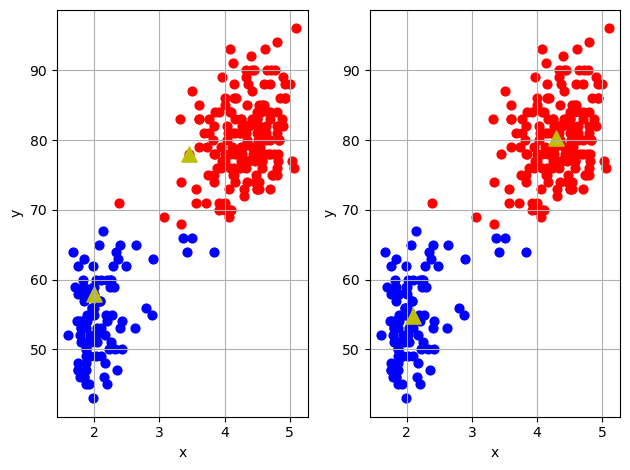

The current iteration of k-means is: 1,                    the average loss is 32.72709088583533.


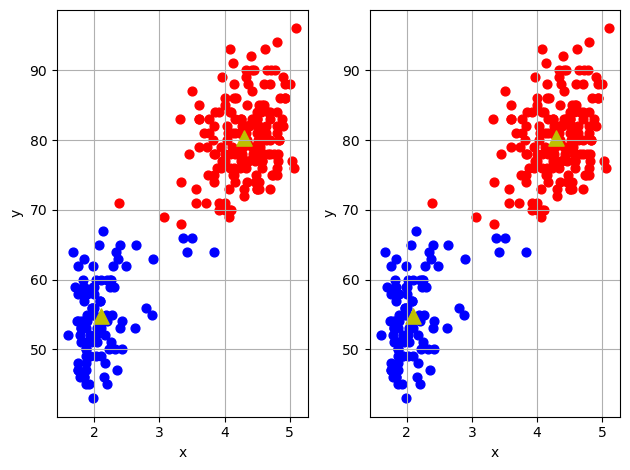

The current iteration of k-means is: 2,                    the average loss is 32.72709088583533.


In [18]:
from helper import build_dir
from plots import plot


def kmeans(data, k, max_iters, threshold, verbose=True):
    """run the k-means algorithm."""
    output_figure = "kmeans_figures/"
    # initialize the cluster.
    mu_old = initialize_clusters(data, k)
    # init some empty lists to store the result.
    loss_list = []

    # start the kmeans algorithm.
    for iteration in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(data, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        if verbose:
            print(
                "The current iteration of k-means is: {i}, \
                   the average loss is {l}.".format(
                    i=iteration, l=average_loss
                )
            )
        # check convergence
        if iteration > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        if verbose:
            plot(data, mu, mu_old, output_figure + "kmean_iter{i}".format(i=iteration))
        # update k-means information.
        mu_old = mu
    return average_loss


# define parameters
k = 2
max_iters = 10
threshold = 1e-5
output_figure = "kmeans_figures/"

# build figure dir
build_dir(output_figure)

# run kmeans algorithm
average_loss = kmeans(data, k, max_iters, threshold)

### Plotting the loss as a function of number of clusters

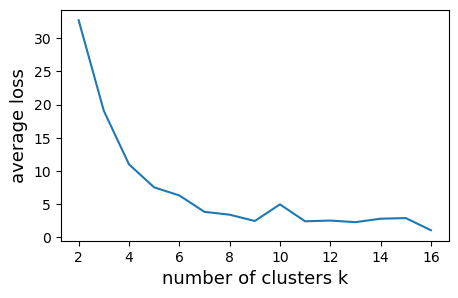

In [19]:
# don't worry about empty slice warnings
import warnings

warnings.filterwarnings("ignore")

losses = []
ks = np.arange(2, 17)
for k in ks:
    average_loss = kmeans(data, k, max_iters, threshold, verbose=False)
    losses += [average_loss]
plt.figure(figsize=(5, 3))
plt.xlabel("number of clusters k", fontsize=13)
plt.ylabel("average loss", fontsize=13)
plt.plot(ks, losses)
plt.show()

## Using k-means for image compresson

#### load image

In [20]:
from helper import load_image

image_path = "mandrill.png"
original_image = load_image(image_path)
print(
    "Original image: the shape of image={s}, the data type={dt}.".format(
        s=original_image.shape, dt=original_image.dtype
    )
)

Original image: the shape of image=(480, 480, 3), the data type=float32.


#### preprocess image

In [21]:
def preprocess_image(original_image):
    """preprocess the image.
    vectorize the three matrices (each matrix corresponds to a RGB color channel). **don't normalize!**

    Args:
        original_image: numpy array of shape (480, 480, 3)
    Returns:
        processed_image: numpy array of shape (480*480, 3)
    """
    return original_image.reshape(-1, 3)


processed_image = preprocess_image(original_image)

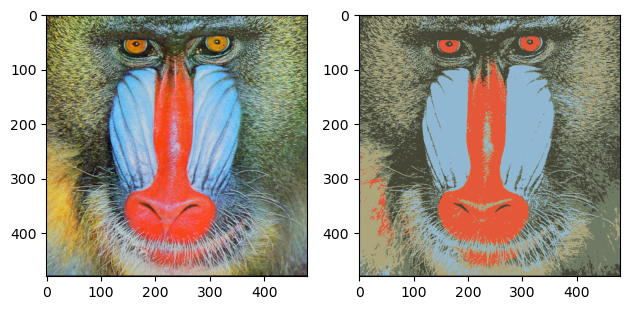

In [23]:
from plots import plot_image_compression


def kmean_compression(original_image, processed_image, k, max_iters, threshold):
    """using k-means for image compression.
    Args:
        original_image: numpy array of shape (480, 480, 3).
        processed_image: numpy array of shape (480*480, 3).
        k: scalar. Number of clusters.
        max_iters: integer. Max number of iterations for the kmeans algorithm.
        threshold: scalar. Stop the kmeans algorithm if the loss decrease between two iterations
                        is lower than the threshold.
    """
    mu_old = initialize_clusters(processed_image, k)
    loss_list = []
    for iteration in range(max_iters):
        # update z and mu
        losses, assignments, mu = update_kmeans_parameters(processed_image, mu_old)
        # calculate the average loss over all points
        average_loss = np.mean(losses)
        loss_list.append(average_loss)
        # check convergence
        if iteration > 0 and np.abs(loss_list[-1] - loss_list[-2]) < threshold:
            break
        # output plot
        mu_old = mu
    # plot histogram
    plot_image_compression(original_image, processed_image, assignments, mu, k)


# define parameters
k = 5
max_iter = 100
threshold = 1e-7

# use kmeans to compress image
kmean_compression(original_image, processed_image, k, max_iter, threshold)